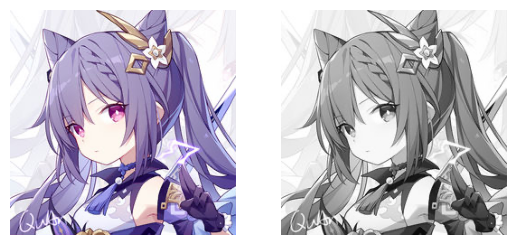

In [130]:
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


def imshow(*args, nrow=1):
    imgs = args
    ncol = math.ceil(len(imgs) / nrow)
    fig, axes = plt.subplots(nrow, ncol, squeeze=False)
    for i, img in enumerate(imgs):
        row = i // ncol
        col = i % ncol
        if img.ndim == 3:
            rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        if img.ndim == 2:
            rgb = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
        axes[row, col].imshow(rgb)
        axes[row, col].set_axis_off()


def normalize(img):
    """
    normalize to [0, 1]
    """
    max_ = img.max()
    min_ = img.min()
    return (img - min_) / (max_ - min_)


img = cv.imread('ke_qing.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gray = np.float32(img_gray / 255)
h, w = img_gray.shape

imshow(img, img_gray)

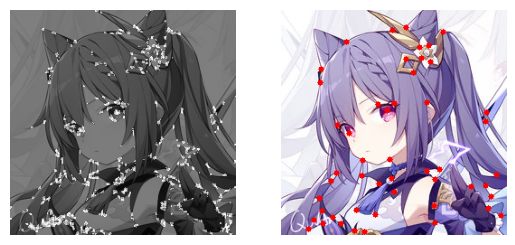

In [131]:
# Harris Corner Detection
# Harris角点检测得到一个与图片大小相同的矩阵
# 矩阵的每个元素表示对应像素是角点的响应值
# 响应值越大，越可能是角点
response = cv.cornerHarris(img_gray, blockSize=3, ksize=3, k=0.04)
harris_mask = response > 0.01 * response.max()
img_harris = 0.5 * img_gray + 0.5 * harris_mask.astype(np.float32)

# goodFeaturesToTrack will find best corners(响应值最高的几个角点) and return their coordinates.
# qualityLevel就是响应值的阈值
# minDistance会去掉离得比较近的像素
corner_xy = cv.goodFeaturesToTrack(img_gray, maxCorners=50, qualityLevel=0.01, minDistance=10)
corner_xy.shape  # (maxCorners, 1, 2), float32
corner_xy = np.int64(corner_xy)
img_corner = img.copy()
for xy in corner_xy:
    x, y = xy.ravel()
    cv.circle(img_corner, (x, y), 3, (0, 0, 255), -1)
imshow(img_harris, img_corner)

(250, 250, 6)


Text(0, 0.5, 'det')

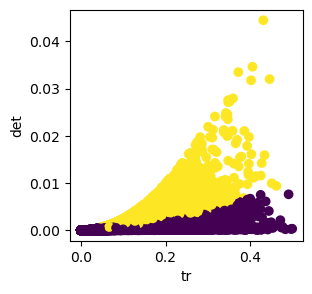

In [140]:
ret = cv.cornerEigenValsAndVecs(img_gray, blockSize=3, ksize=3)
print(ret.shape)  # (H, W, 6), (lambda1, lambda2, x1, y1, x2, y2)
lambda1 = ret[:, :, 0]
lambda2 = ret[:, :, 1]
det = lambda1 * lambda2
tr = lambda1 + lambda2
plt.figure(figsize=(3, 3))
plt.scatter(tr.ravel(), det.ravel(), c=harris_mask.ravel())
plt.xlabel('tr')
plt.ylabel('det')

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size']
(12.960874557495117, 200.82882690429688)
247.54119873046875
4.901170253753662
(408, 128)


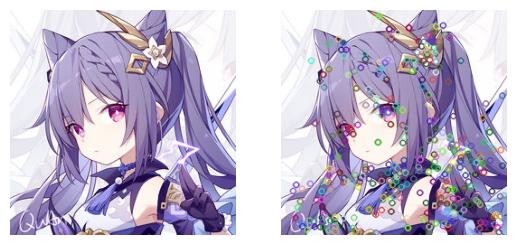

In [133]:
# SIFT
# detectAndCompute只接受uint8类型的图片
sift = cv.SIFT_create()
# sift.detect()
# sift.compute()
keypoints, descriptions = sift.detectAndCompute((img_gray * 255).astype(np.uint8), None)
img_keypoint = cv.drawKeypoints(img, keypoints, None)
keypoint = keypoints[0]  # keypoints is a tuple, each keypoint is an object
print(dir(keypoint))
print(keypoint.pt)  # position
print(keypoint.angle)
print(keypoint.size)
print(descriptions.shape)
imshow(img, img_keypoint)

In [134]:
# SURF

In [135]:
# FAST

In [136]:
# BRIEF

In [137]:
# ORB, Oriented FAST and Rotated BRIEF

In [138]:
# feature matching